In [5]:
import numpy as np
import cv2
%matplotlib inline
from matplotlib import pyplot as plt
import math
import os
import copy

In this program I implemented a principal component analysis (PCA) algorithm which is used to reduce dimensions in a multidimensional data. This can be used for compression or for classification of data. Our goal is to find a vector on which we can project our multidimensional data such that when we reconstruct the data back, it minimizes the reprojection error. We do that by first calculating the covariance matrix of the data and then taking the biggest few eigenvectors of it to project data onto. Here we are doing this method on a set of faces. Each eigenvector we obtain with PCA represents a partial summation of the whole dataset of faces and we can play around with how many eigenvectors we use when reconstructing the data.We can see that even if we use just the first eigenvector for reconstructing, the face still looks recognisable.


In [11]:
def dualPCA(input):
    X = np.transpose(input)
    meanCoor = np.mean(input, axis=0)
    centered = np.zeros((X.shape[0],X.shape[1]))

    for i in np.arange(X.shape[1]):
        centered[:,i] = np.subtract(X[:,i], meanCoor )

    cov = np.transpose(centered) @ centered
    cov = np.multiply(cov, 1 / (input.shape[1]-1) )
    U,S,V = np.linalg.svd(cov)

    S = S + 1e-15
    spodi = np.multiply( S,(input.shape[1]-1)) 
    test = np.sqrt(spodi)
    test = np.diag(test)
    test = np.linalg.inv( test )
       
    U = centered @ U @ test

    return U,S,V

In [12]:

def reshapingData(files,dir):
    m = (cv2.imread("data/faces/" + str(dir) + "/" + files[0])).shape[0]
    n = (cv2.imread("data/faces/" + str(dir) + "/" + files[0])).shape[1]
    big = np.zeros((len(files),m*n))
    for i in range(len(files)):
        im = cv2.imread("data/faces/" + str(dir) + "/" + files[i])
        im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
        im = np.reshape(im, (1,m*n))
        big[i,:] = im
    return m,n,big  


Text(0.5, 1.0, '3. reconstructed face\n with the first 3 eigenvectors set to zero')

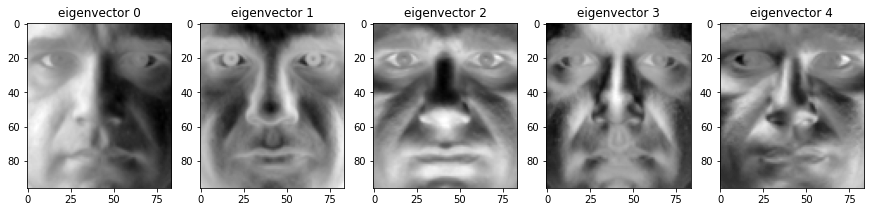

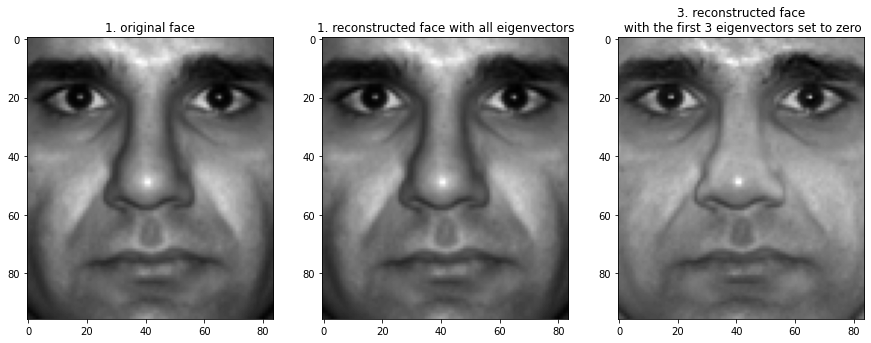

In [16]:
# 0. dual PCA on all the faces
files = sorted(os.listdir("data/faces/1"))
F_m,F_n,F_reshaped = reshapingData(files,1)

F_U,_,_ = dualPCA(F_reshaped)

F_mean = np.mean(F_reshaped, axis=0)
_, ax = plt.subplots(1, 5, figsize=(15, 15),squeeze=False)
for i in range(5):
    im = np.reshape(F_U[:,i], (F_m,F_n))
    ax[0][i].imshow(im, cmap="gray")
    ax[0][i].set_title("eigenvector " + str(i))

# 1. projection of the first face into PCA space
_, ax = plt.subplots(1, 3, figsize=(15, 15),squeeze=False)
F_first_face = F_reshaped[0,:]
F_y = np.transpose(F_U) @ (F_first_face - F_mean)
F_first_face = np.reshape(F_first_face, (F_m,F_n))
ax[0][0].imshow(F_first_face, cmap="gray")
ax[0][0].set_title("1. original face")

# 2. reconstruction of the first face with all eigenvectors
F_recon = (F_U @ F_y) + F_mean
F_recon = np.reshape(F_recon, (F_m,F_n))
ax[0][1].imshow(F_recon, cmap="gray")
ax[0][1].set_title("1. reconstructed face with all eigenvectors")

# 3. projection of the first face into PCA space and setting y[2] to 0
F_first_face = F_reshaped[0,:]
F_y = np.transpose(F_U) @ (F_first_face - F_mean)
F_y[0] = 0
F_y[1] = 0
F_y[2] = 0

# 4. reconstruction of the first face
F_recon2 = (F_U @ F_y) + F_mean
F_recon2 = np.reshape(F_recon2, (F_m,F_n))
ax[0][2].imshow(F_recon2, cmap="gray")
ax[0][2].set_title("3. reconstructed face\n with the first 3 eigenvectors set to zero")


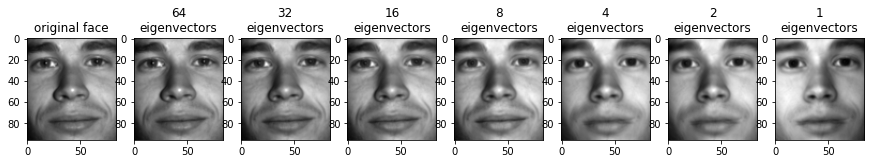

In [15]:
files2 = sorted(os.listdir("data/faces/2"))
F_m2,F_n2,F_reshaped2 = reshapingData(files2,2)

#1. dualPCA
F_U2,_,_ = dualPCA(F_reshaped2)
F_mean2 = np.mean(F_reshaped2, axis=0)

# 1. projection of the 20. face into PCA space
_, ax = plt.subplots(1, 8, figsize=(15, 15),squeeze=False)

random_face = F_reshaped2[10,:]
random_F_y = np.transpose(F_U2) @ (random_face - F_mean2)
random_face = np.reshape(random_face, (F_m2,F_n2))
ax[0][0].imshow(random_face, cmap="gray")
ax[0][0].set_title("original face")

# 2. reconstruction of the 20. face
F_recon = (F_U2 @ random_F_y) + F_mean2
F_recon = np.reshape(F_recon, (F_m,F_n))
ax[0][1].imshow(F_recon, cmap="gray")
ax[0][1].set_title("1. reconstructed face")

# 3. reconstruction of the 20. face with first 32 components
j = 64
for i in range(7):
    random_F_y[int(j):64] = 0
    F_recon = (F_U2 @ random_F_y) + F_mean2
    F_recon = np.reshape(F_recon, (F_m,F_n))
    ax[0][i+1].imshow(F_recon, cmap="gray")
    ax[0][i+1].set_title(str(int(j)) + "\neigenvectors")
    j = j/2